# Breast Cancer Detection Using Machine Learning: An Investigation and Algorithm Development

**- Shemayon Soloman**

## Introduction

Breast cancer is a prevalent form of cancer affecting millions of women worldwide. It involves the uncontrolled growth of abnormal cells in breast tissue, with the potential to spread to other parts of the body if not detected and treated early. Early detection and accurate diagnosis are crucial for effective treatment and improved survival rates.

## Aim and Objectives

**Aim:**
The primary goal of this study is to develop a robust machine learning algorithm for the accurate and efficient detection of breast cancer using available datasets.

**Objectives:**
1. Investigate the key features influencing breast cancer.
2. Determine the optimal machine learning algorithm for breast cancer detection.


In [1]:
# importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv(r"C:\Users\shema\OneDrive\Desktop\github\Breast Cancer\BC_data.csv")
df = data
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [3]:
df.shape

(699, 11)

In [4]:
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

### Exploratory Data Analysis

Column 'bare_nucleoli' not found. Skipping...


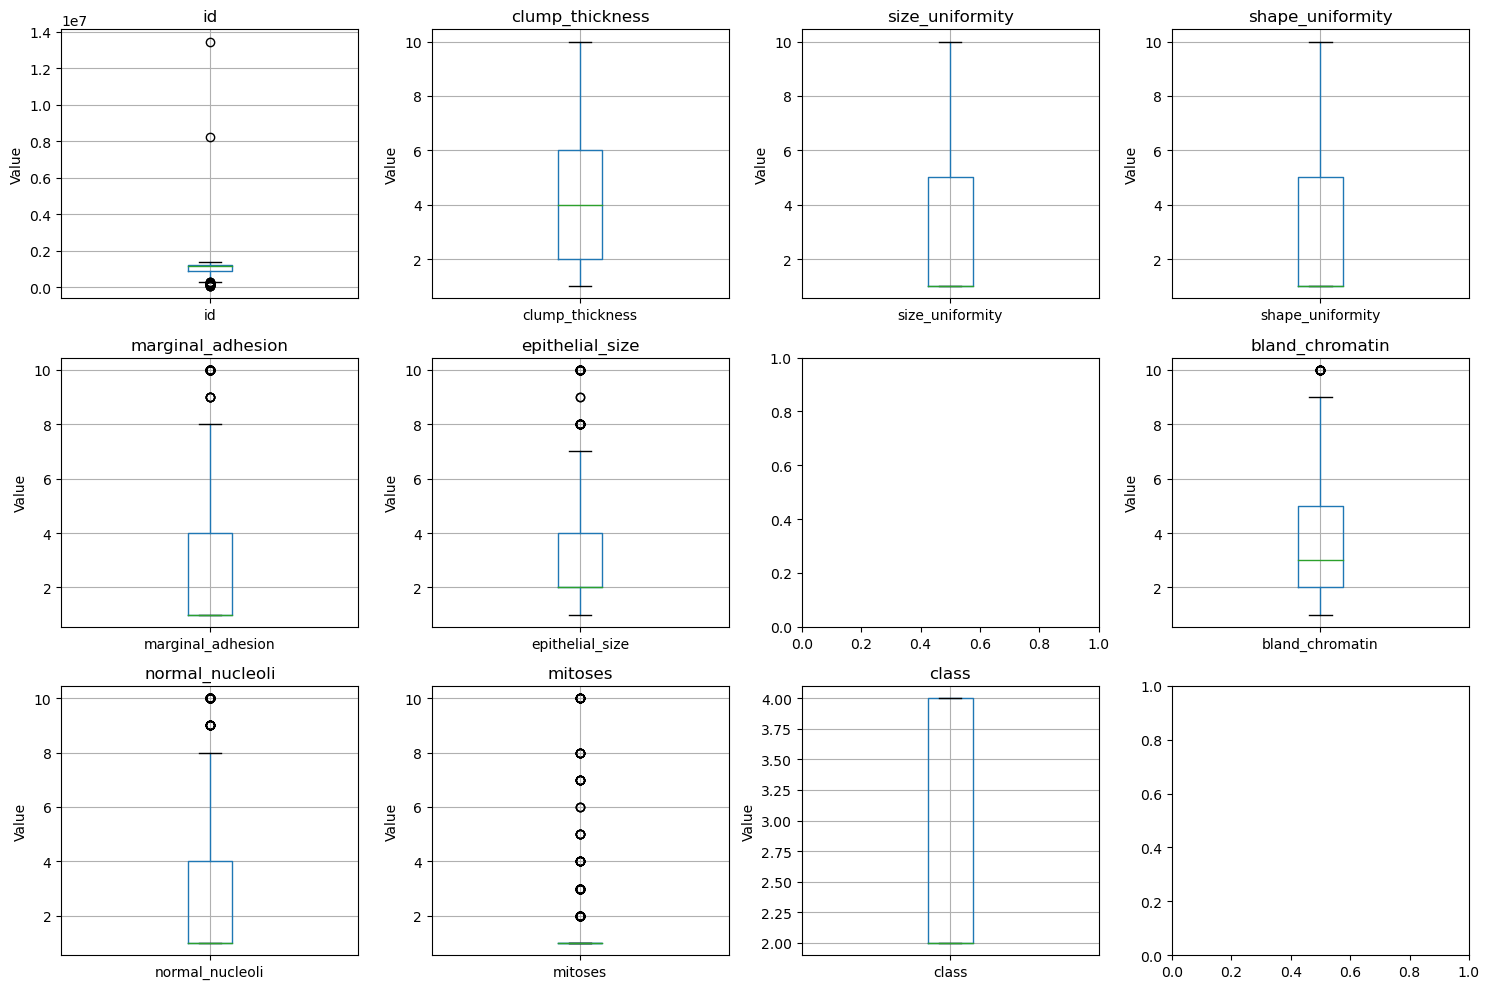

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    try:
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel("Value")
    except KeyError:
        print(f"Column '{col}' not found. Skipping...")

plt.tight_layout()
plt.show()

In [6]:
# Convert relevant columns to numeric

numeric_cols = ['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 'mitoses', 'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli', 'class']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [7]:
# Detecting Outliers

for col in df.columns:
    if col in numeric_cols:  
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        print(f"Number of outliers for variable {col}: {outliers}")
    else:
        print(f"Skipping non-numeric column: {col}")

Number of outliers for variable id: 23
Number of outliers for variable clump_thickness: 0
Number of outliers for variable size_uniformity: 0
Number of outliers for variable shape_uniformity: 0
Number of outliers for variable marginal_adhesion: 60
Number of outliers for variable epithelial_size: 54
Number of outliers for variable bare_nucleoli: 0
Number of outliers for variable bland_chromatin: 20
Number of outliers for variable normal_nucleoli: 77
Number of outliers for variable mitoses: 120
Number of outliers for variable class: 0


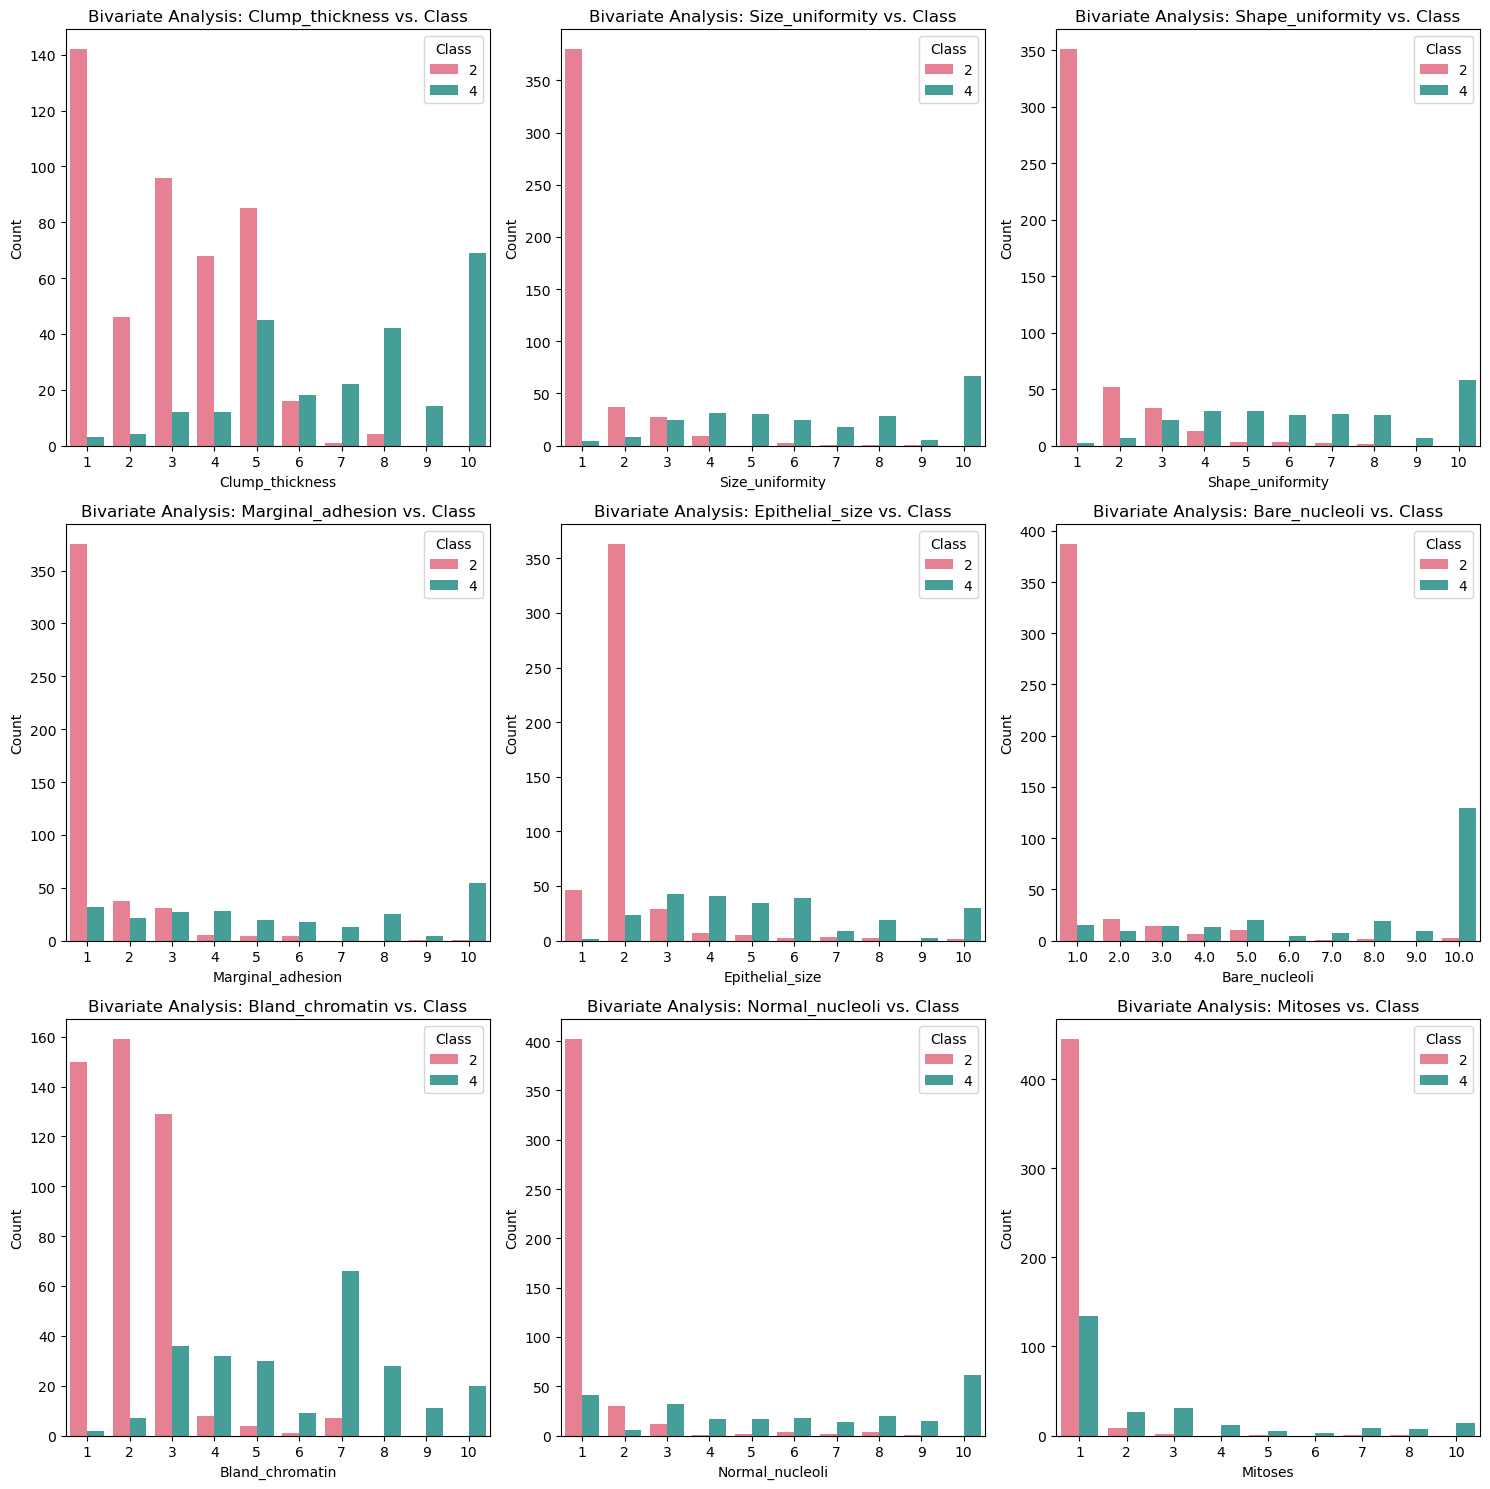

In [8]:
df.reset_index(drop=True, inplace=True)
if 'id' in df.columns:
    df = df.drop(columns=['id'])

columns_to_compare = df.columns[df.columns != 'class']
unique_classes = df['class'].unique()

num_classes = len(unique_classes)
default_palette = sns.color_palette('husl', num_classes)
custom_palette = dict(zip(unique_classes, default_palette))

num_plots = len(columns_to_compare)
num_cols = 3  # Number of columns for subplots
num_rows = -(-num_plots // num_cols) 

plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(columns_to_compare, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, hue='class', palette=custom_palette)
    plt.xlabel(col.capitalize())  
    plt.ylabel('Count')
    plt.title(f'Bivariate Analysis: {col.capitalize()} vs. Class')
    plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### Data Transformation

In [9]:
from sklearn.impute import SimpleImputer
target_variable = df['class']

if 'class' in df.columns:
    df = df.drop(columns=['class'])
if 'id' in df.columns:
    df = df.drop(columns=['id'])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [10]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_imputed)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

data_final = pd.concat([normalized_df, target_variable], axis=1)

data_final.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,2


In [11]:
# Convert string class labels to numeric values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_final['class'] = label_encoder.fit_transform(data_final['class'])

print("Updated 'class' variable:")
data_final['class'].head(10)

Updated 'class' variable:


0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: class, dtype: int64

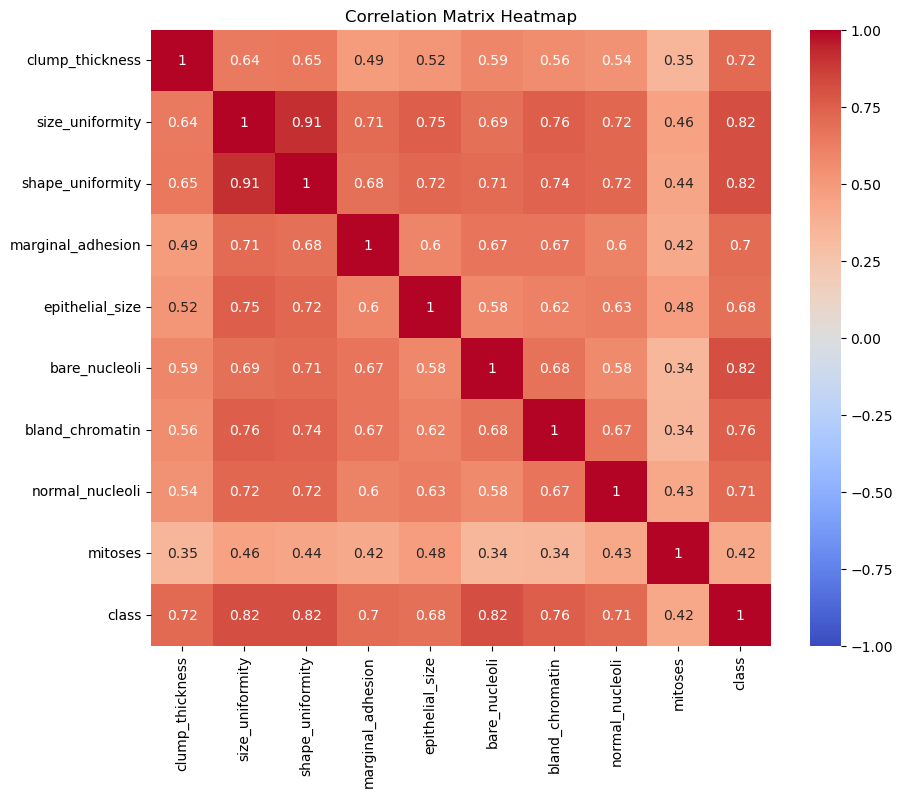

In [12]:
# Calculating the correlation matrix
correlation_matrix = data_final.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
correlation_matrix

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


### Correlation Summary

- The variable **"clump_thickness"** has the highest positive correlation with the **"class"** variable(0.7160), indicating that higher values of clump thickness are associated with a higher likelihood of the tumor being malignant.


- Similarly, **"size_uniformity"** and **"shape_uniformity"** also have high positive correlations with the **"class"** variable (0.8179) and (0.8189), suggesting that larger and more irregularly shaped cells are associated with a higher likelihood of malignancy.


- Other variables such as **"bare_nucleoli," "bland_chromatin,"** and **"normal_nucleoli"** also exhibit moderate positive correlations with the **"class"** variable, indicating their influence on tumor classification.


- The variable **"mitoses"** has a relatively lower positive correlation with the **"class"** variable (0.4231), suggesting a weaker association.


- All variables exhibit positive correlations with each other, indicating some level of interdependence or relationship among the variables in the dataset.

### Model Building

In [14]:
from sklearn.model_selection import train_test_split

print("Class Distribution in Full Dataset:")
print(data_final['class'].value_counts())
print("Proportion of Classes in Full Dataset:")
print(data_final['class'].value_counts(normalize=True))

# Data splitting
X = data_final.drop(columns=['class'])  # Features
y = data_final['class']  # Target variable

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution in Test Set:")
print(y_test.value_counts(normalize=True))

Class Distribution in Full Dataset:
0    458
1    241
Name: class, dtype: int64
Proportion of Classes in Full Dataset:
0    0.655222
1    0.344778
Name: class, dtype: float64

Class Distribution in Training Set:
0    0.658318
1    0.341682
Name: class, dtype: float64

Class Distribution in Test Set:
0    0.642857
1    0.357143
Name: class, dtype: float64


In [15]:
# Oversampling the training set

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=123)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

print("\nClass Distribution in Training Set (After Oversampling):")
print(pd.Series(y_train_over).value_counts(normalize=True))


Class Distribution in Training Set (After Oversampling):
0    0.5
1    0.5
Name: class, dtype: float64


### Logistic Regression

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=101)
classifier_lr.fit(X_train_over, y_train_over)

pred_train_lr = classifier_lr.predict(X_train_over)

pred_test_lr = classifier_lr.predict(X_test)

cm_train_lr = confusion_matrix(y_train_over, pred_train_lr)
cm_test_lr = confusion_matrix(y_test, pred_test_lr)

# Training set accuracy
train_accuracy_lr = accuracy_score(y_train_over, pred_train_lr)
print("Training Set Accuracy (Logistic Regression):", train_accuracy_lr)

# Test set accuracy
test_accuracy_lr = accuracy_score(y_test, pred_test_lr)
print("Test Set Accuracy (Logistic Regression):", test_accuracy_lr)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_lr)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_lr)

Training Set Accuracy (Logistic Regression): 0.96875
Test Set Accuracy (Logistic Regression): 0.9785714285714285

Confusion Matrix (Training Set):
[[358  10]
 [ 13 355]]

Confusion Matrix (Test Set):
[[88  2]
 [ 1 49]]


### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state=101)

selector = SelectFromModel(estimator=classifier_rf, threshold='median')

selector.fit(X_train_over, y_train_over)

X_train_selected = selector.transform(X_train_over)
X_test_selected = selector.transform(X_test)

# hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_selected, y_train_over)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_

pred_train_rf = best_rf_model.predict(X_train_selected)

pred_test_rf = best_rf_model.predict(X_test_selected)

# Evaluation
cm_train_rf = confusion_matrix(y_train_over, pred_train_rf)
cm_test_rf = confusion_matrix(y_test, pred_test_rf)

# Training set accuracy
train_accuracy_rf = accuracy_score(y_train_over, pred_train_rf)
print("Training Set Accuracy (Random Forest classifier):", train_accuracy_rf)

# Test set accuracy
test_accuracy_rf = accuracy_score(y_test, pred_test_rf)
print("Test Set Accuracy (Random Forest classifier):", test_accuracy_rf)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_rf)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_rf)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Training Set Accuracy (Random Forest classifier): 0.9823369565217391
Test Set Accuracy (Random Forest classifier): 0.9571428571428572

Confusion Matrix (Training Set):
[[356  12]
 [  1 367]]

Confusion Matrix (Test Set):
[[84  6]
 [ 0 50]]


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=101)

# hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=classifier_dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_dt.fit(X_train_over, y_train_over)

best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters (Decision Tree):", best_params_dt)

best_dt_model = grid_search_dt.best_estimator_

pred_train_dt = best_dt_model.predict(X_train_over)

pred_test_dt = best_dt_model.predict(X_test)

cm_train_dt = confusion_matrix(y_train_over, pred_train_dt)
cm_test_dt = confusion_matrix(y_test, pred_test_dt)

# Training set accuracy
train_accuracy_dt = accuracy_score(y_train_over, pred_train_dt)
print("Training Set Accuracy (Decision Tree):", train_accuracy_dt)

# Test set accuracy
test_accuracy_dt = accuracy_score(y_test, pred_test_dt)
print("Test Set Accuracy (Decision Tree):", test_accuracy_dt)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_dt)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_dt)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters (Decision Tree): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training Set Accuracy (Decision Tree): 0.9809782608695652
Test Set Accuracy (Decision Tree): 0.9285714285714286

Confusion Matrix (Training Set):
[[356  12]
 [  2 366]]

Confusion Matrix (Test Set):
[[80 10]
 [ 0 50]]


### Support Vector Machine ( SVM )

In [19]:
from sklearn.svm import SVC

classifier_svm = SVC(random_state=101)

# hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svm = GridSearchCV(estimator=classifier_svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_svm.fit(X_train_over, y_train_over)

best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters (SVM):", best_params_svm)

best_svm_model = grid_search_svm.best_estimator_

pred_train_svm = best_svm_model.predict(X_train_over)

pred_test_svm = best_svm_model.predict(X_test)

cm_train_svm = confusion_matrix(y_train_over, pred_train_svm)
cm_test_svm = confusion_matrix(y_test, pred_test_svm)

# Training set accuracy
train_accuracy_svm = accuracy_score(y_train_over, pred_train_svm)
print("Training Set Accuracy (SVM):", train_accuracy_svm)

# Test set accuracy
test_accuracy_svm = accuracy_score(y_test, pred_test_svm)
print("Test Set Accuracy (SVM):", test_accuracy_svm)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_svm)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_svm)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters (SVM): {'C': 10, 'gamma': 'scale'}
Training Set Accuracy (SVM): 0.9904891304347826
Test Set Accuracy (SVM): 0.9428571428571428

Confusion Matrix (Training Set):
[[362   6]
 [  1 367]]

Confusion Matrix (Test Set):
[[83  7]
 [ 1 49]]


### K-Nearest Neighbor ( KNN )

In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()

# hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

grid_search_knn = GridSearchCV(estimator=classifier_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_knn.fit(X_train_over, y_train_over)

best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters (KNN):", best_params_knn)

best_knn_model = grid_search_knn.best_estimator_

pred_train_knn = best_knn_model.predict(X_train_over)

pred_test_knn = best_knn_model.predict(X_test)

cm_train_knn = confusion_matrix(y_train_over, pred_train_knn)
cm_test_knn = confusion_matrix(y_test, pred_test_knn)

# Training set accuracy
train_accuracy_knn = accuracy_score(y_train_over, pred_train_knn)
print("Training Set Accuracy (KNN):", train_accuracy_knn)

# Test set accuracy
test_accuracy_knn = accuracy_score(y_test, pred_test_knn)
print("Test Set Accuracy (KNN):", test_accuracy_knn)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_knn)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_knn)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters (KNN): {'n_neighbors': 5}
Training Set Accuracy (KNN): 0.9809782608695652
Test Set Accuracy (KNN): 0.9785714285714285

Confusion Matrix (Training Set):
[[356  12]
 [  2 366]]

Confusion Matrix (Test Set):
[[87  3]
 [ 0 50]]


### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

classifier_nb = GaussianNB()

classifier_nb.fit(X_train_over, y_train_over)

pred_train_nb = classifier_nb.predict(X_train_over)

pred_test_nb = classifier_nb.predict(X_test)

cm_train_nb = confusion_matrix(y_train_over, pred_train_nb)
cm_test_nb = confusion_matrix(y_test, pred_test_nb)

# Training set accuracy
train_accuracy_nb = accuracy_score(y_train_over, pred_train_nb)
print("Training Set Accuracy (Naive Bayes):", train_accuracy_nb)

# Test set accuracy
test_accuracy_nb = accuracy_score(y_test, pred_test_nb)
print("Test Set Accuracy (Naive Bayes):", test_accuracy_nb)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_nb)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_nb)

# Cross-validation
cv_scores_nb = cross_val_score(classifier_nb, X_train_over, y_train_over, cv=5)
print("\nCross-Validation Scores (Naive Bayes):", cv_scores_nb)
print("Mean CV Accuracy (Naive Bayes):", cv_scores_nb.mean())


Training Set Accuracy (Naive Bayes): 0.9619565217391305
Test Set Accuracy (Naive Bayes): 0.9571428571428572

Confusion Matrix (Training Set):
[[351  17]
 [ 11 357]]

Confusion Matrix (Test Set):
[[85  5]
 [ 1 49]]

Cross-Validation Scores (Naive Bayes): [0.97972973 0.97278912 0.94557823 0.96598639 0.96598639]
Mean CV Accuracy (Naive Bayes): 0.9660139731568302


### XGBoost Classifier

In [22]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

classifier_xgb = XGBClassifier(
    learning_rate=0.1, n_estimators=100, max_depth=3,
    min_child_weight=1, gamma=0.1,
    subsample=0.8, colsample_bytree=0.8,
    objective='binary:logistic', random_state=101)

classifier_xgb.fit(X_train_scaled, y_train_over)

pred_train_xgb = classifier_xgb.predict(X_train_scaled)

pred_test_xgb = classifier_xgb.predict(X_test_scaled)

cm_train_xgb = confusion_matrix(y_train_over, pred_train_xgb)
cm_test_xgb = confusion_matrix(y_test, pred_test_xgb)

# Training set accuracy
train_accuracy_xgb = accuracy_score(y_train_over, pred_train_xgb)
print("Training Set Accuracy (XGBoost):", train_accuracy_xgb)

# Test set accuracy
test_accuracy_xgb = accuracy_score(y_test, pred_test_xgb)
print("Test Set Accuracy (XGBoost):", test_accuracy_xgb)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_xgb)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_xgb)


Training Set Accuracy (XGBoost): 0.9877717391304348
Test Set Accuracy (XGBoost): 0.9714285714285714

Confusion Matrix (Training Set):
[[360   8]
 [  1 367]]

Confusion Matrix (Test Set):
[[86  4]
 [ 0 50]]


### Multi Layer Perceptron ( MLP )

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

classifier_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',  # Activation function
    solver='sgd',  # Optimizer
    alpha=0.0001,  # L2 regularization parameter
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=101,
    early_stopping=True,  # early stopping
    n_iter_no_change=10,  # Number of iterations with no improvement to wait before stopping
    validation_fraction=0.2,  # Fraction of training data to use for validation
    verbose=True
)

classifier_mlp.fit(X_train_scaled, y_train_over)

pred_train_mlp = classifier_mlp.predict(X_train_scaled)

pred_test_mlp = classifier_mlp.predict(X_test_scaled)

cm_train_mlp = confusion_matrix(y_train_over, pred_train_mlp)
cm_test_mlp = confusion_matrix(y_test, pred_test_mlp)

# Training set accuracy
train_accuracy_mlp = accuracy_score(y_train_over, pred_train_mlp)
print("Training Set Accuracy (MLP):", train_accuracy_mlp)

# Test set accuracy
test_accuracy_mlp = accuracy_score(y_test, pred_test_mlp)
print("Test Set Accuracy (MLP):", test_accuracy_mlp)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_mlp)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_mlp)


Iteration 1, loss = 0.81318628
Validation score: 0.189189
Iteration 2, loss = 0.80334962
Validation score: 0.189189
Iteration 3, loss = 0.78860815
Validation score: 0.222973
Iteration 4, loss = 0.77067719
Validation score: 0.283784
Iteration 5, loss = 0.75054131
Validation score: 0.297297
Iteration 6, loss = 0.72981928
Validation score: 0.412162
Iteration 7, loss = 0.70861889
Validation score: 0.560811
Iteration 8, loss = 0.68777910
Validation score: 0.635135
Iteration 9, loss = 0.66720939
Validation score: 0.716216
Iteration 10, loss = 0.64710269
Validation score: 0.837838
Iteration 11, loss = 0.62777465
Validation score: 0.885135
Iteration 12, loss = 0.60927200
Validation score: 0.925676
Iteration 13, loss = 0.59139988
Validation score: 0.952703
Iteration 14, loss = 0.57435440
Validation score: 0.959459
Iteration 15, loss = 0.55814978
Validation score: 0.972973
Iteration 16, loss = 0.54283685
Validation score: 0.986486
Iteration 17, loss = 0.52813857
Validation score: 0.986486
Iterat

### Artificial Neural Network ( ANN )

In [24]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, callbacks


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]),
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True  # Restore weights to the best epoch
)

history = model.fit(
    X_train_scaled, y_train_over,
    validation_split=0.2,
    epochs=100,  # Maximum number of epochs
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

pred_train_ann = model.predict(X_train_scaled)
pred_train_ann = (pred_train_ann > 0.5).astype(int)

pred_test_ann = model.predict(X_test_scaled)
pred_test_ann = (pred_test_ann > 0.5).astype(int)

cm_train_ann = confusion_matrix(y_train_over, pred_train_ann)
cm_test_ann = confusion_matrix(y_test, pred_test_ann)

# Training set accuracy
train_accuracy_ann = accuracy_score(y_train_over, pred_train_ann)
print("Training Set Accuracy (ANN):", train_accuracy_ann)

# Test set accuracy
test_accuracy_ann = accuracy_score(y_test, pred_test_ann)
print("Test Set Accuracy (ANN):", test_accuracy_ann)

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training Set):")
print(cm_train_ann)

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test_ann)


Epoch 1/100
19/19 [==============================] - 2s 23ms/step - loss: 0.4592 - accuracy: 0.8759 - val_loss: 0.2137 - val_accuracy: 0.9730
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.2038 - accuracy: 0.9609 - val_loss: 0.1275 - val_accuracy: 0.9730
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1268 - accuracy: 0.9592 - val_loss: 0.1019 - val_accuracy: 0.9730
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 0.0869 - val_accuracy: 0.9730
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.9643 - val_loss: 0.0807 - val_accuracy: 0.9730
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0931 - accuracy: 0.9643 - val_loss: 0.0742 - val_accuracy: 0.9730
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0912 - accuracy: 0.9677 - val_loss: 0.0694 - val_accuracy: 0.9730
Epoch 8/100


### Model Evaluation

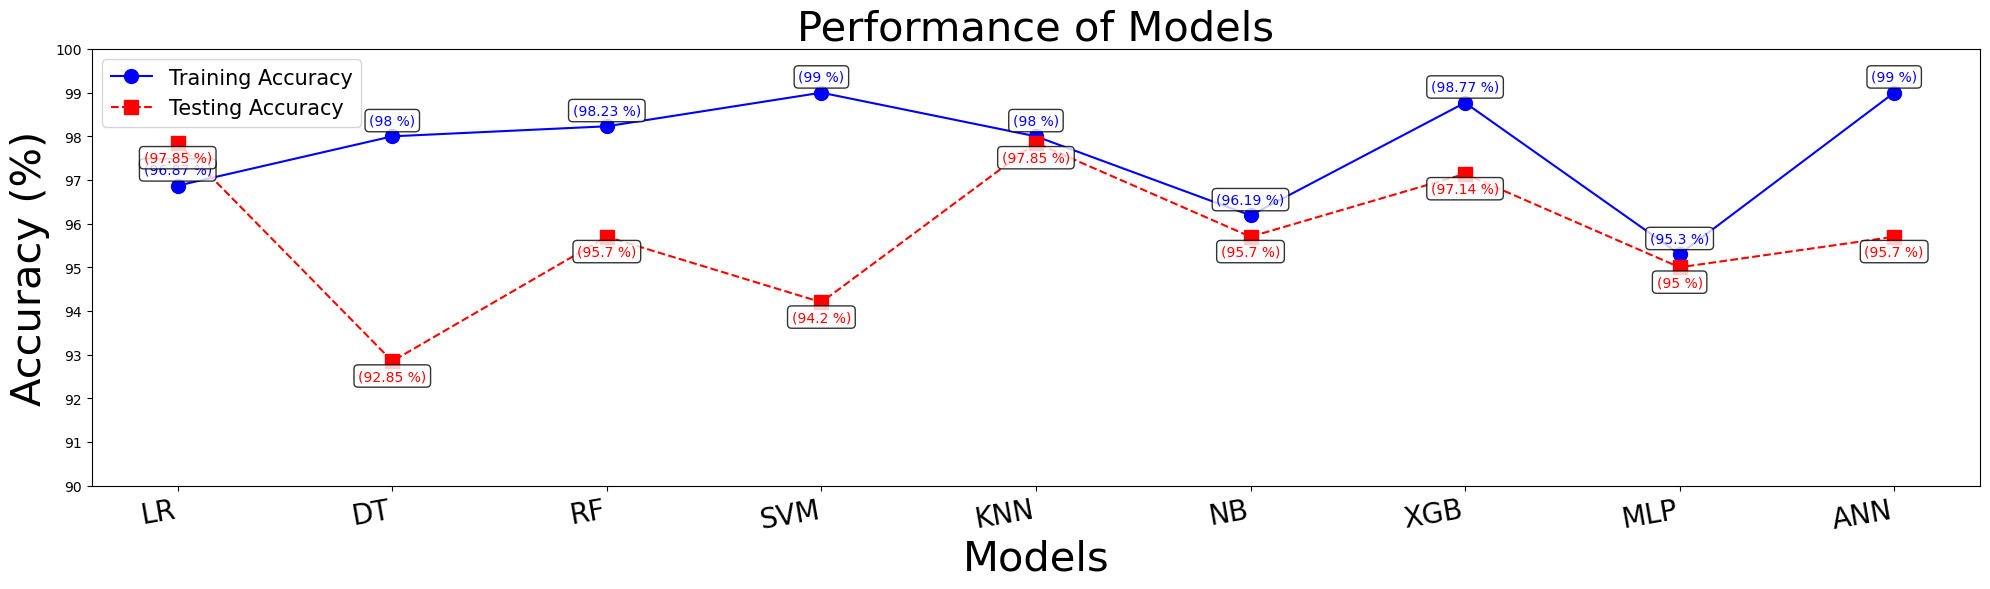

In [26]:
train_accuracy = [96.87, 98, 98.23, 99, 98, 96.19, 98.77, 95.3, 99]
test_accuracy = [97.85, 92.85, 95.7, 94.2, 97.85, 95.7, 97.14, 95, 95.7]

x = list(range(len(train_accuracy)))
y = list(range(90, 101, 1))

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20, 6))

plt.plot(x, train_accuracy, marker='o', linestyle='-', color='b', markersize=10, label='Training Accuracy')
for a, b in zip(x, train_accuracy):
    val = "(" + str(round(b, 2)) + " %)"
    plt.text(a, b + 0.2, val, ha='center', va='bottom', color='blue', bbox=props)

plt.plot(x, test_accuracy, marker='s', linestyle='--', color='r', markersize=10, label='Testing Accuracy')
for a, b in zip(x, test_accuracy):
    val = "(" + str(round(b, 2)) + " %)"
    plt.text(a, b - 0.5, val, ha='center', va='bottom', color='red', bbox=props)

plt.yticks(y)
plt.xticks(x, ['LR', 'DT', 'RF', 'SVM', 'KNN', 'NB', 'XGB', 'MLP', 'ANN'], fontsize=20, rotation=10, ha='right')
plt.xlabel("Models", fontsize=30)
plt.ylabel("Accuracy (%)", fontsize=30)
plt.title("Performance of Models", fontsize=30)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Training_Testing_Performance_Together.jpg', dpi=600)
plt.show()


### Model Comparison:
- **Highest Training Accuracy**: SVM, ANN (99.00%)
- **Highest Testing Accuracy**: LR , KNN (97.85%)

    
### Summary:
- **Logistic Regression (LR)** and **K-Nearest Neighbors (KNN)** performed consistently well on both training and testing data.
- **Decision Tree (DT)** showed a noticeable drop in performance on the testing set compared to training.
- **Support Vector Machine (SVM) and Artificial Neural Network (ANN)** achieved the highest training accuracy but a lower testing accuracy, indicating potential overfitting.
- **Random Forest (RF)** and **XGBoost (XGB)** performed well but had a slightly lower testing accuracy compared to LR and KNN.
- **Multilayer Perceptron (MLP)** had a good training accuracy but a lower testing accuracy, suggesting some degree of overfitting.
- **Artificial Neural Network (ANN)** also performed well with a high training accuracy, but slightly lower than LR and KNN on the testing set.

### Key Features

- The variable with the highest positive correlation with the target variable (class) is size_uniformity (0.8207), followed by shape_uniformity (0.8207) and bare_nucleoli (0.8205). 
- These variables have a strong positive relationship with the class variable, indicating that higher values of these variables are associated with a higher likelihood of the tumor being malignant.

- The variable with the highest negative correlation with the target variable (class) is mitoses (-0.4244). 
- This negative correlation suggests that higher values of mitoses are associated with a higher likelihood of the tumor being benign.

- Other variables such as clump_thickness, marginal_adhesion, epithelial_size, bland_chromatin, and normal_nucleoli also show moderate positive correlations with the target variable, indicating their influence on the tumor's class.


### Optimal Algorithm
- **Logistic Regression (LR)** is the best-performing model on the testing set with an accuracy of 97.85%.
- **K-Nearest Neighbors (KNN)** is also a strong performer with an accuracy of 97.85% on the testing set.

